In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Number of clients
num_clients = 200

# Generate synthetic data
purchase_frequency = np.random.poisson(lam=5, size=num_clients)
total_revenue = np.random.normal(loc=5000, scale=2000, size=num_clients)
avg_order_value = total_revenue / np.where(purchase_frequency == 0, 1, purchase_frequency)
payment_timeliness = np.random.normal(loc=90, scale=10, size=num_clients)  # percentage
support_tickets = np.random.poisson(lam=2, size=num_clients)
contract_length = np.random.randint(1, 24, size=num_clients)
last_purchase_days_ago = np.random.exponential(scale=30, size=num_clients)
customer_engagement = np.random.normal(loc=70, scale=15, size=num_clients)  # score out of 100

# Create DataFrame
data = pd.DataFrame({
    'PurchaseFrequency': purchase_frequency,
    'TotalRevenue': total_revenue,
    'AvgOrderValue': avg_order_value,
    'PaymentTimeliness': payment_timeliness,
    'SupportTickets': support_tickets,
    'ContractLength': contract_length,
    'LastPurchaseDaysAgo': last_purchase_days_ago,
    'CustomerEngagement': customer_engagement
})

# Clean data (e.g., handle negatives and limit percentages to 0-100)
data['TotalRevenue'] = data['TotalRevenue'].clip(lower=0)
data['PaymentTimeliness'] = data['PaymentTimeliness'].clip(0, 100)
data['CustomerEngagement'] = data['CustomerEngagement'].clip(0, 100)

# Display first few rows
print("Sample Data:")
print(data.head())

Sample Data:
   PurchaseFrequency  TotalRevenue  AvgOrderValue  PaymentTimeliness  \
0                  5   1380.082198     276.016440          91.975660   
1                  4   6930.029922    1732.507481          94.492284   
2                  4   4039.736265    1009.934066          79.233395   
3                  5   5255.605395    1051.121079          96.684080   
4                  5   5734.204534    1146.840907          79.104069   

   SupportTickets  ContractLength  LastPurchaseDaysAgo  CustomerEngagement  
0               0              11             5.529837          100.000000  
1               0              22             8.507014           63.845778  
2               0               9            54.706648           33.621786  
3               4               9            13.210346           69.547425  
4               2               5            52.601842           68.904498  


/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

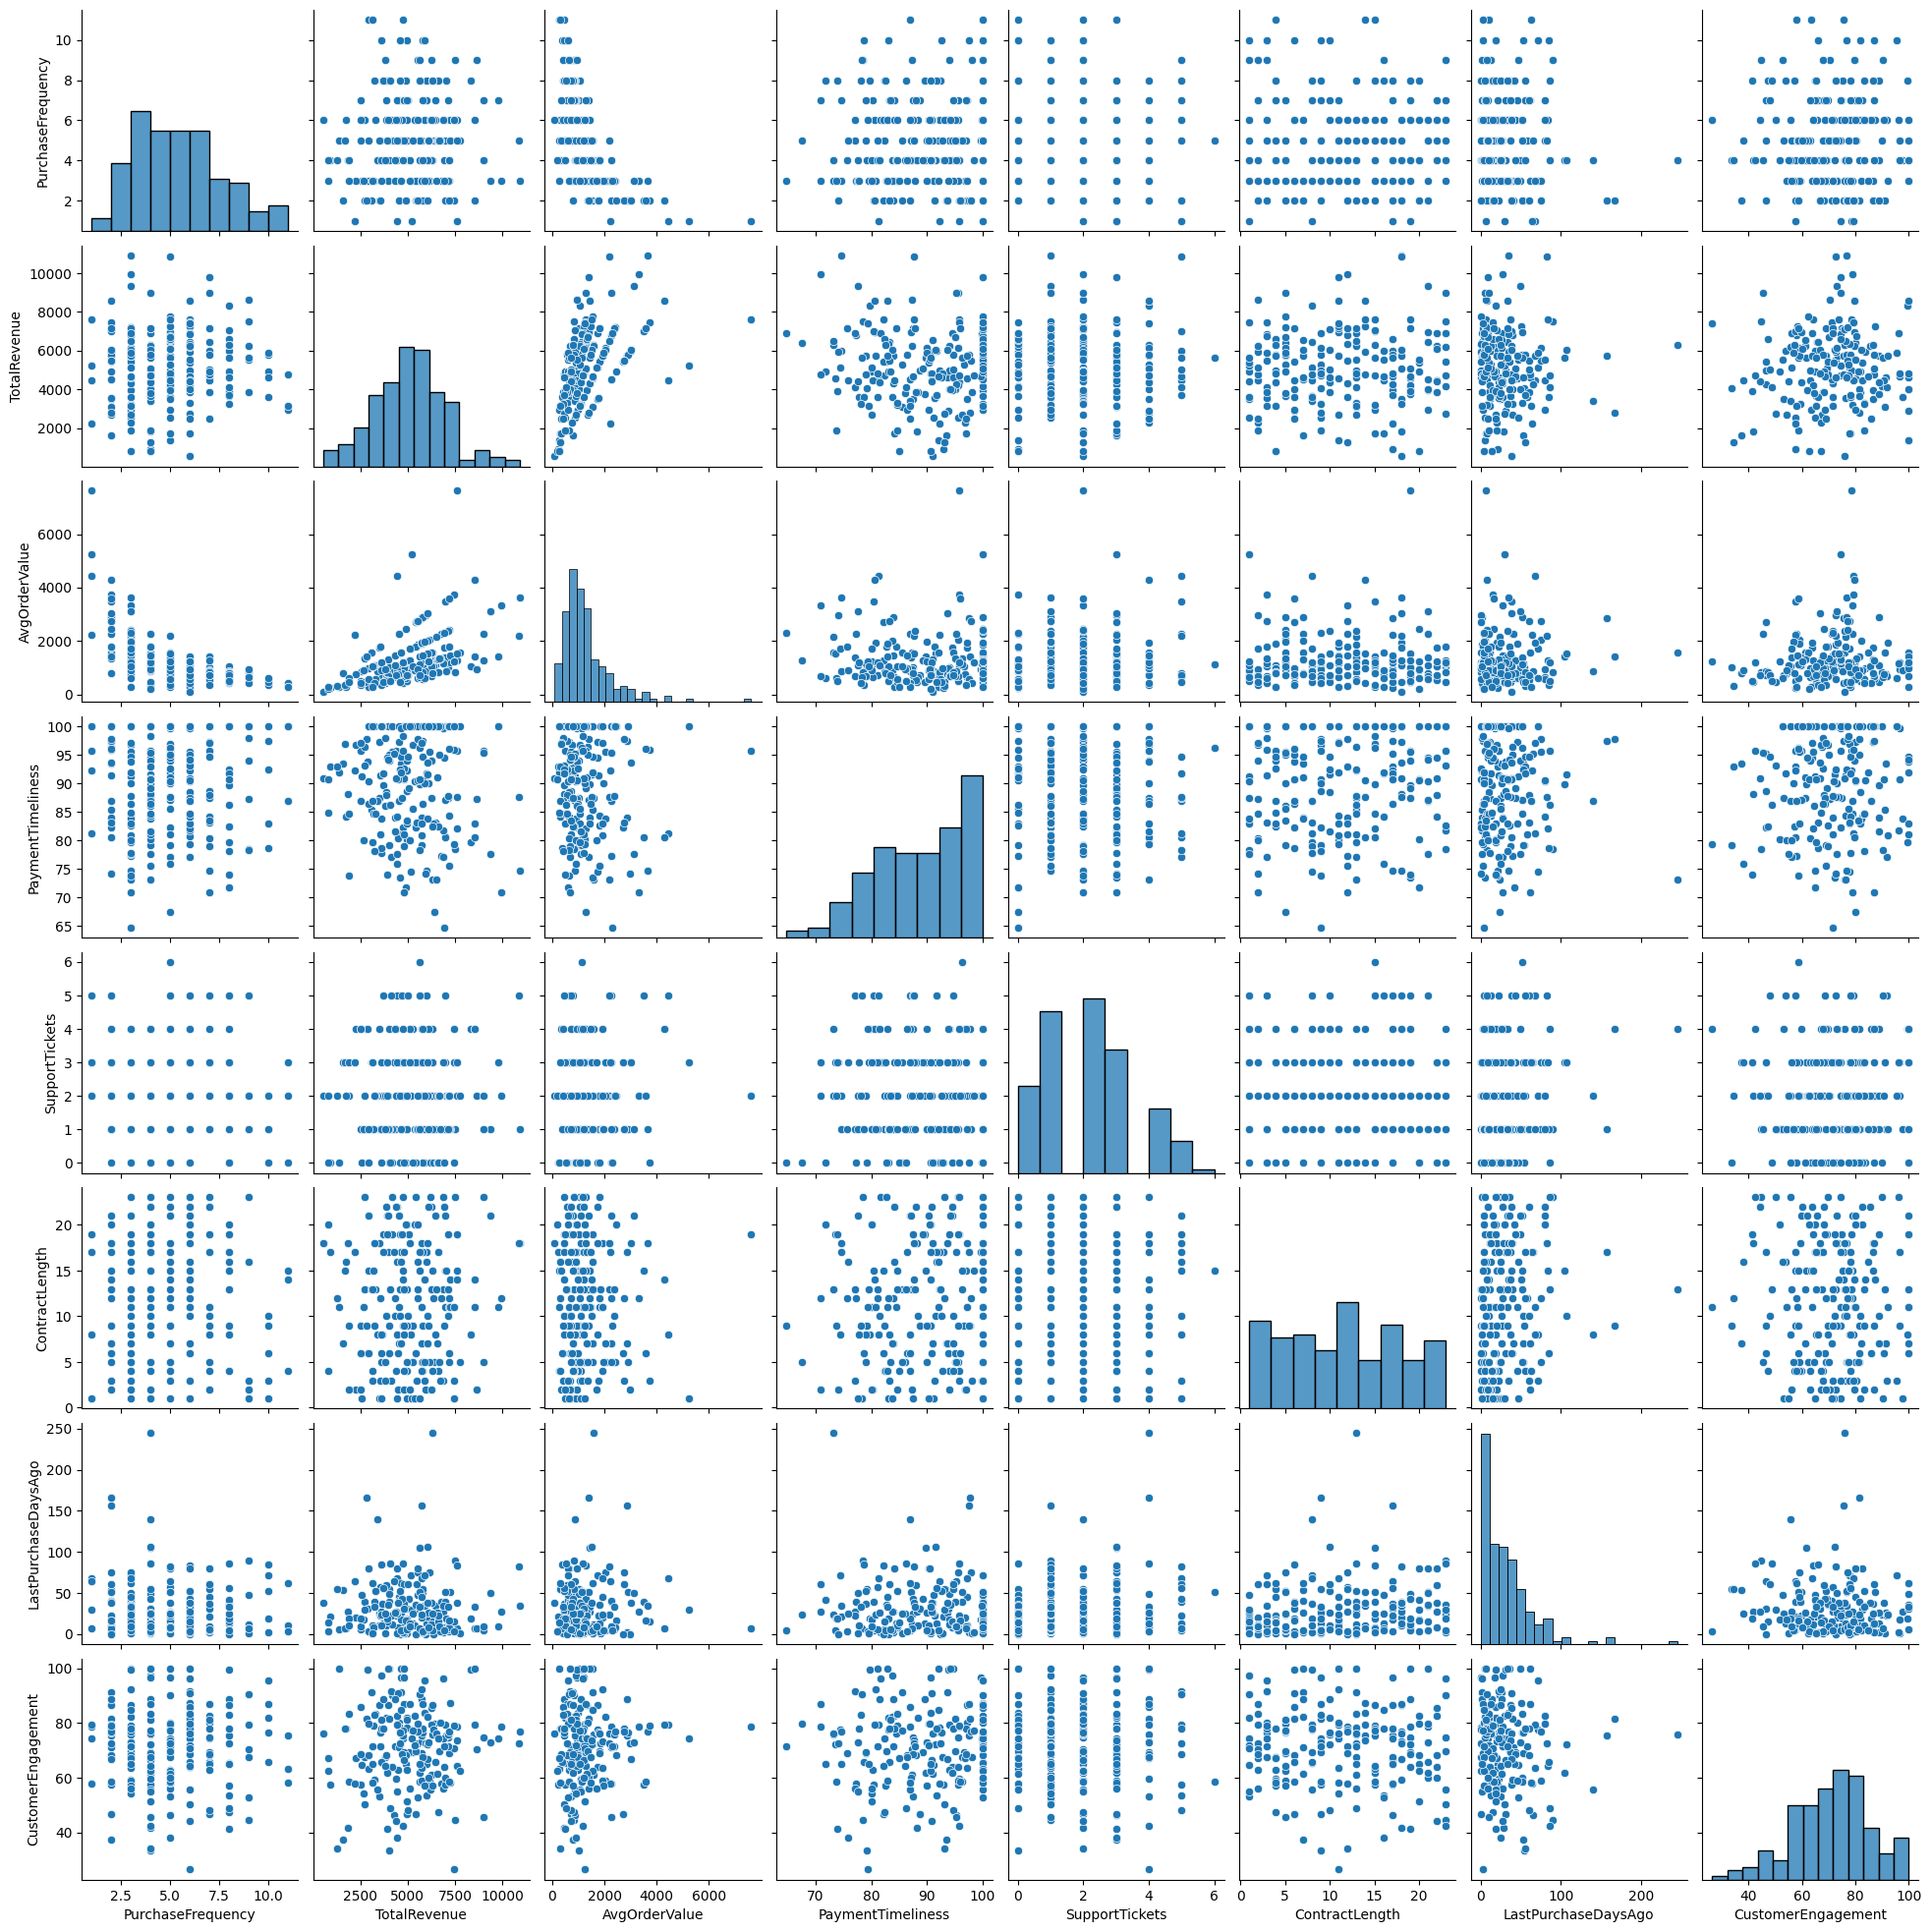

In [2]:
# Plot scatter matrix
sns.pairplot(data)
plt.show()


/Users/mubeen/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


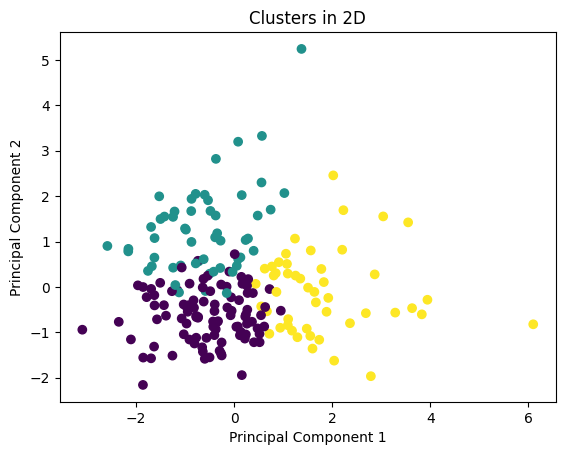


Cluster Statistics:
         PurchaseFrequency  TotalRevenue  AvgOrderValue  PaymentTimeliness  \
Cluster                                                                      
0                 5.744898   4896.501775     922.917331          90.610603   
1                 5.425926   4262.448399     867.773446          88.252635   
2                 2.812500   6535.508765    2586.546803          86.923730   

         SupportTickets  ContractLength  LastPurchaseDaysAgo  \
Cluster                                                        
0              1.918367        9.081633            19.869859   
1              2.277778       16.018519            52.734484   
2              2.020833       11.416667            29.533290   

         CustomerEngagement  
Cluster                      
0                 78.504078  
1                 58.608871  
2                 70.593166  


In [3]:
# Plot the clusters in 2D 
def plot_clusters(data, labels):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Clusters in 2D')
    plt.show()


# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_scaled)

# Plot clusters in 2D
plot_clusters(data_scaled, labels)

# Add cluster labels to DataFrame
data['Cluster'] = labels

# Display cluster statistics
print("\nCluster Statistics:")
print(data.groupby('Cluster').mean())


In [9]:
# Generate synthetic data (as before)
np.random.seed(42)
num_clients = 200
purchase_frequency = np.random.poisson(lam=5, size=num_clients)
total_revenue = np.random.normal(loc=5000, scale=2000, size=num_clients)
avg_order_value = total_revenue / np.where(purchase_frequency == 0, 1, purchase_frequency)
payment_timeliness = np.random.normal(loc=90, scale=10, size=num_clients)
support_tickets = np.random.poisson(lam=2, size=num_clients)
contract_length = np.random.randint(1, 24, size=num_clients)
last_purchase_days_ago = np.random.exponential(scale=30, size=num_clients)
customer_engagement = np.random.normal(loc=70, scale=15, size=num_clients)

data = pd.DataFrame({
    'PurchaseFrequency': purchase_frequency,
    'TotalRevenue': total_revenue.clip(min=0, max=100),
    'AvgOrderValue': avg_order_value,
    'PaymentTimeliness': payment_timeliness.clip(0, 100),
    'SupportTickets': support_tickets,
    'ContractLength': contract_length,
    'LastPurchaseDaysAgo': last_purchase_days_ago,
    'CustomerEngagement': customer_engagement.clip(0, 100)
})

# Features for clustering
features = ['PurchaseFrequency', 'TotalRevenue', 'AvgOrderValue', 'PaymentTimeliness',
            'SupportTickets', 'ContractLength', 'LastPurchaseDaysAgo', 'CustomerEngagement']

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

# Assign relationship quality based on clusters
cluster_summary = data.groupby('Cluster')[features].mean()
if cluster_summary.loc[0, 'TotalRevenue'] > cluster_summary.loc[1, 'TotalRevenue']:
    good_cluster = 0
    neutral_cluster = 1
else:
    good_cluster = 1
    neutral_cluster = 0

data['RelationshipQuality'] = data['Cluster'].map({
    good_cluster: 'Good Relationship',
    neutral_cluster: 'Neutral Relationship'
})

/Users/mubeen/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seabo

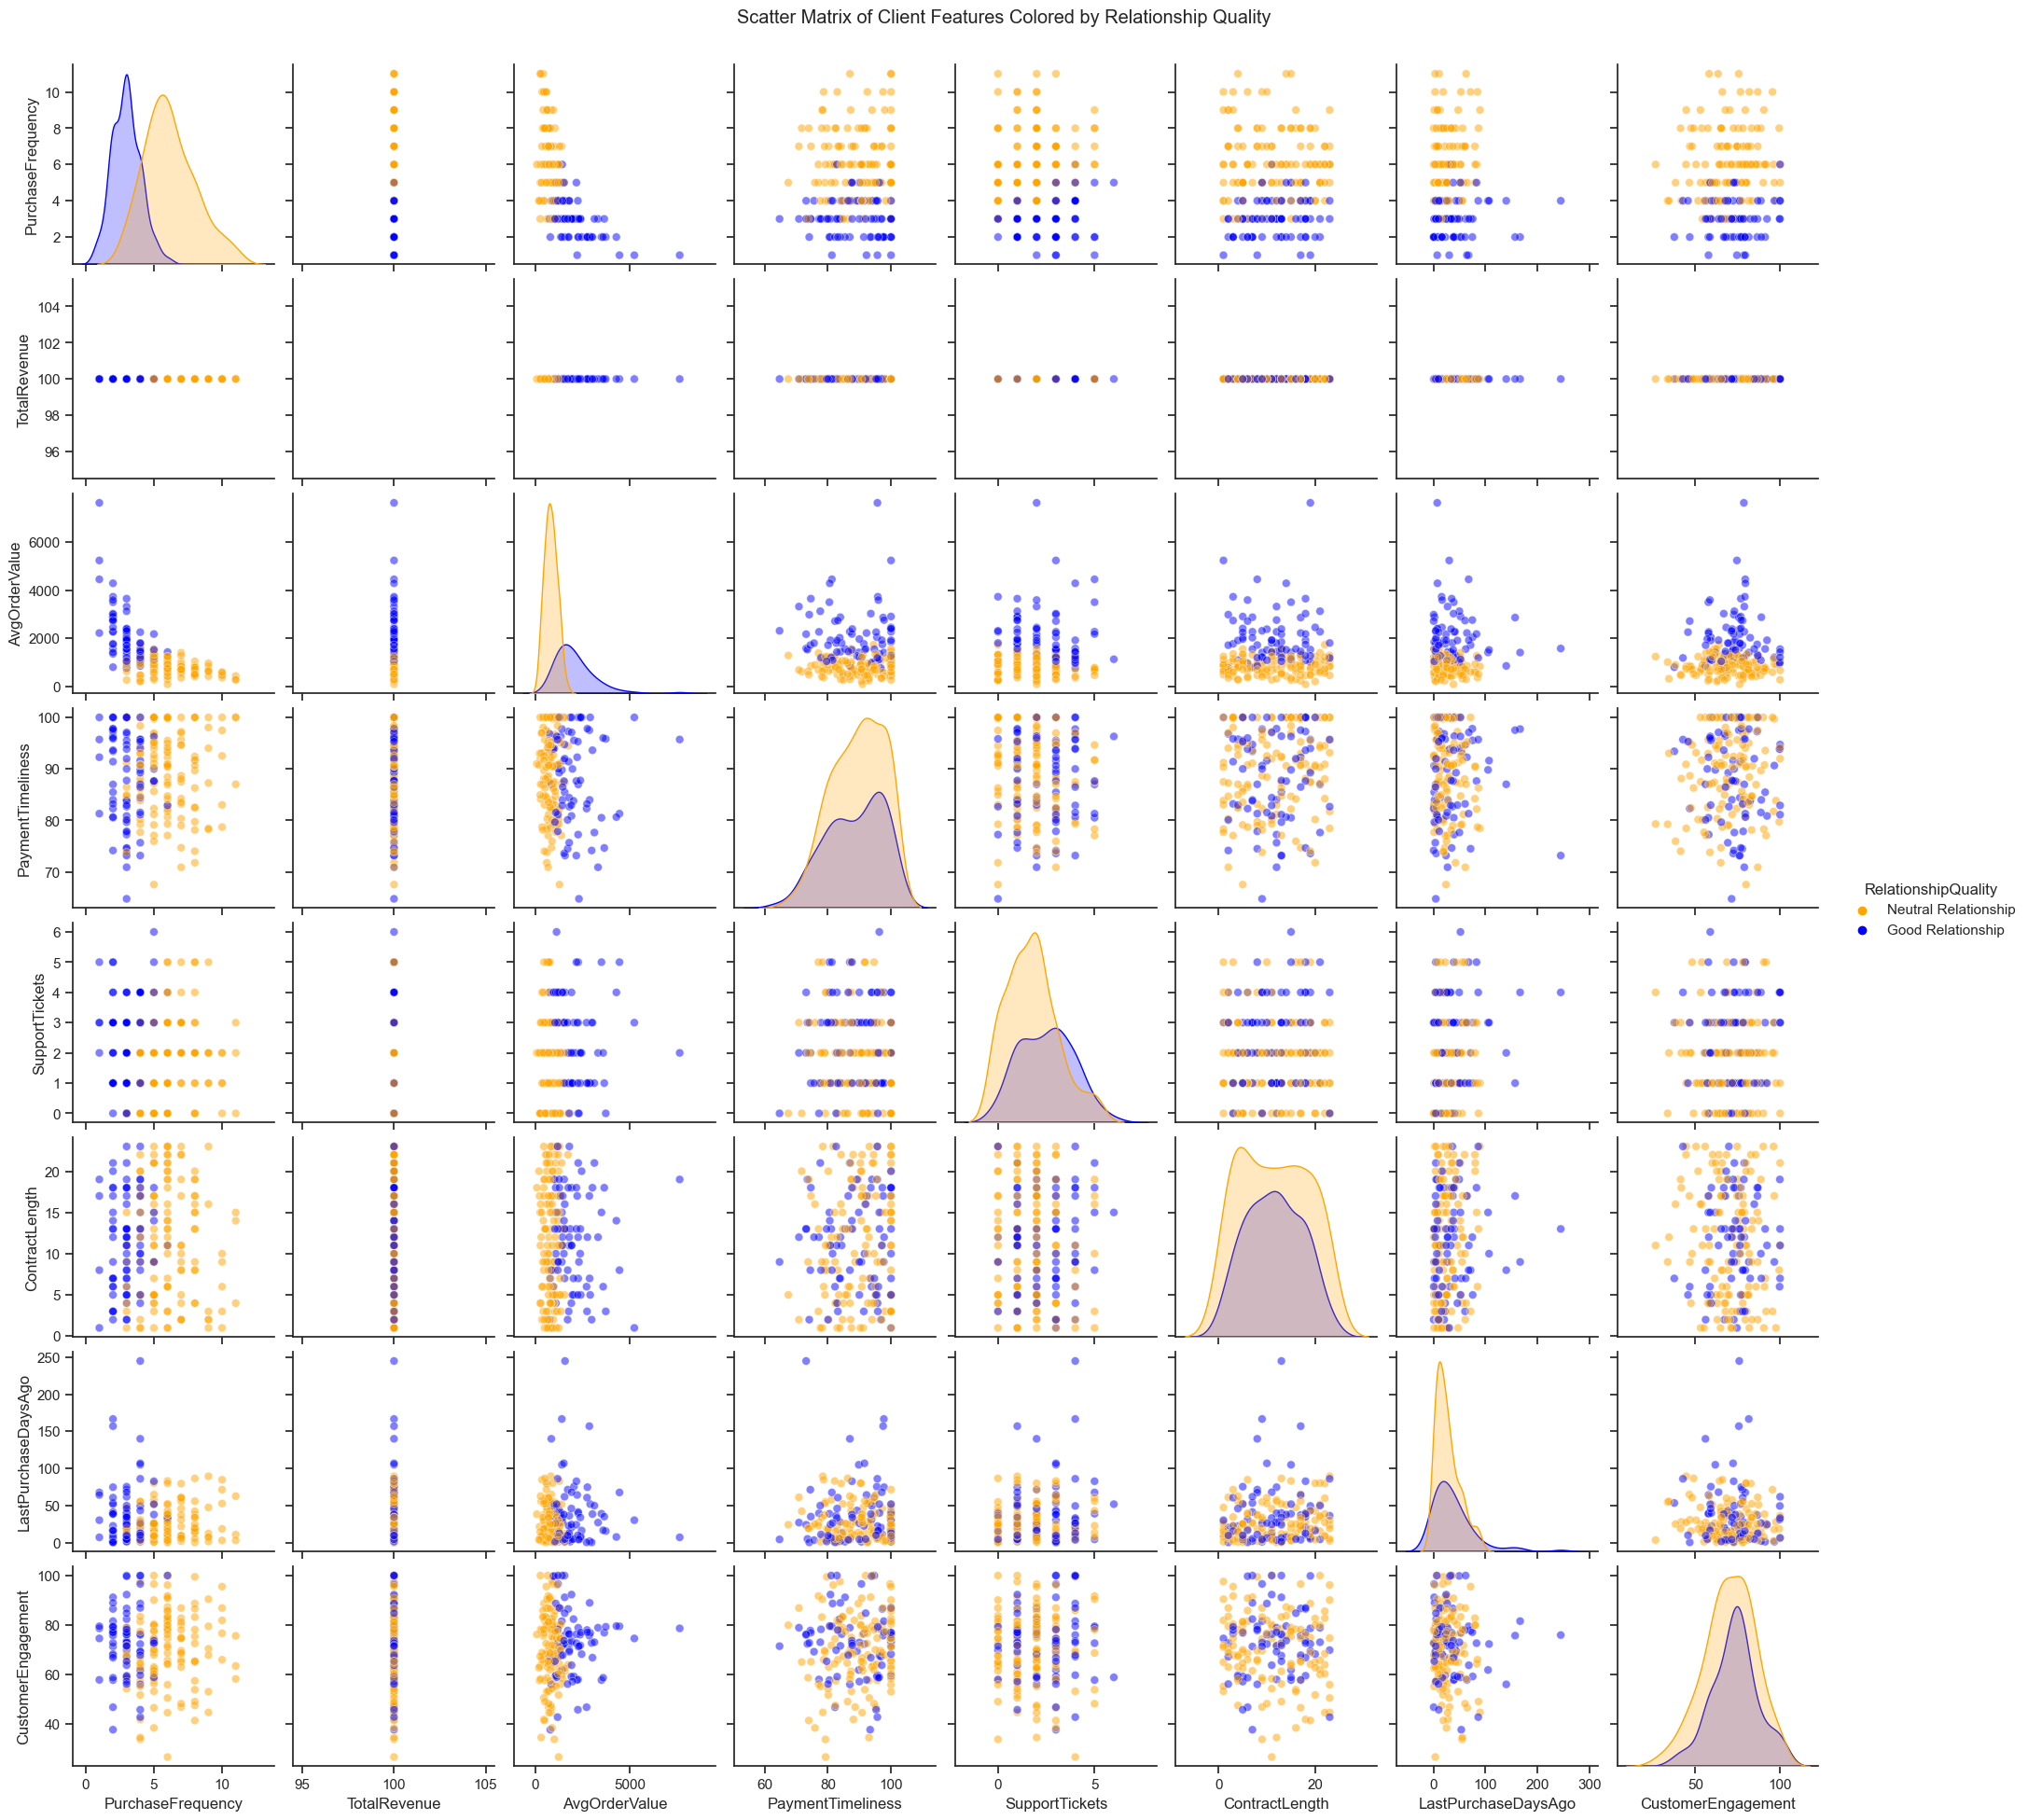

In [10]:
import seaborn as sns

# List of features to include in the scatter matrix
plot_features = ['PurchaseFrequency', 'TotalRevenue', 'AvgOrderValue', 'PaymentTimeliness',
                 'SupportTickets', 'ContractLength', 'LastPurchaseDaysAgo', 'CustomerEngagement']

# Create the pair plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data[plot_features + ['RelationshipQuality']], 
                 hue='RelationshipQuality', 
                 palette={'Good Relationship': 'blue', 'Neutral Relationship': 'orange'},
                 diag_kind='kde',  # Use kernel density estimate for diagonal plots
                 plot_kws={'alpha': 0.5, 's': 40},  # Transparency and size of the points
                 height=2.5)  # Size of the plots

# Adjust the top and bottom margins to prevent overlapping labels
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Scatter Matrix of Client Features Colored by Relationship Quality')

plt.show()

/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seabo

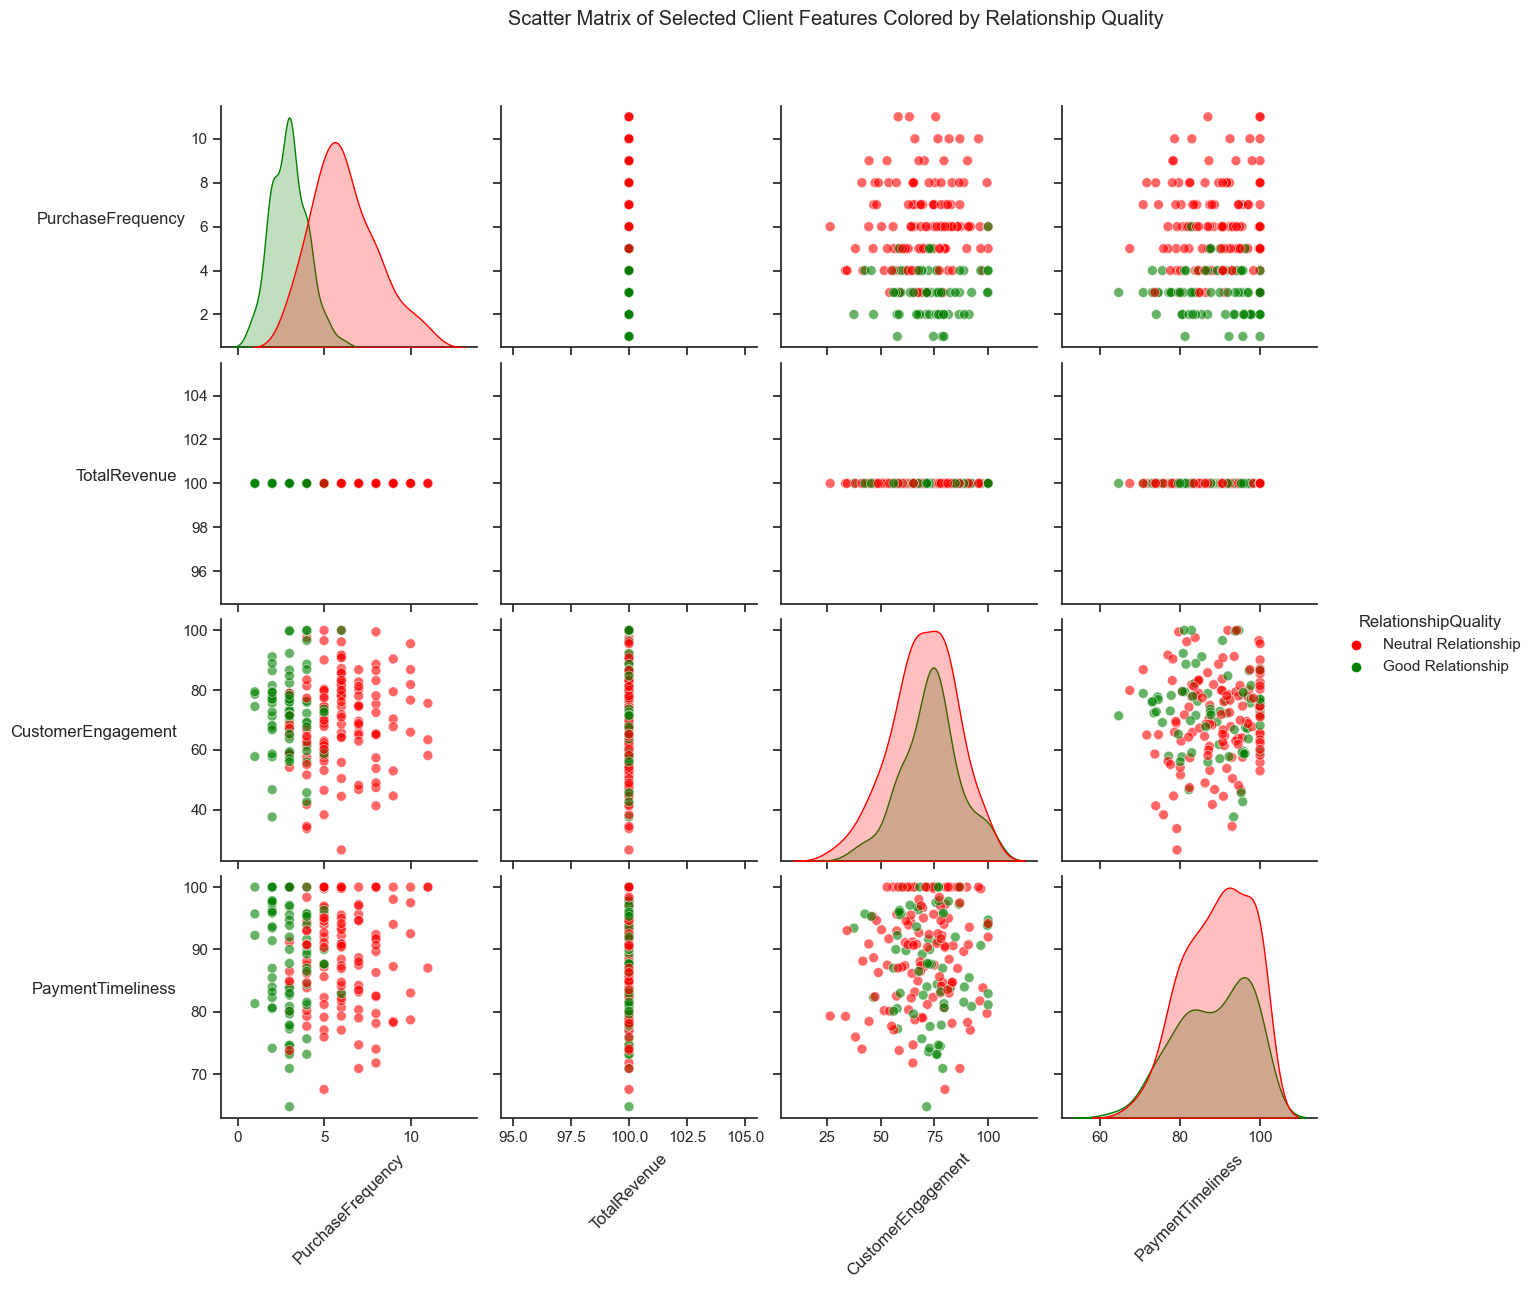

In [11]:
import seaborn as sns

# Select features to include in the pair plot
selected_features = ['PurchaseFrequency', 'TotalRevenue', 'CustomerEngagement', 'PaymentTimeliness']

# Create the pair plot
sns.set(style="ticks")
g = sns.pairplot(data[selected_features + ['RelationshipQuality']], 
                 hue='RelationshipQuality', 
                 palette={'Good Relationship': 'green', 'Neutral Relationship': 'red'},
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.6, 's': 50},
                 height=3)

# Rotate x-axis labels
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=45)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Matrix of Selected Client Features Colored by Relationship Quality')

plt.show()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Number of clients
num_clients = 200

# Generate RiskScore and TimeWithCompany for Good Relationship clients
good_risk_score = np.random.normal(loc=30, scale=5, size=int(num_clients * 0.6))  # Lower risk scores
good_time_with_company = np.random.normal(loc=10, scale=2, size=int(num_clients * 0.6))  # Longer time

# Generate RiskScore and TimeWithCompany for Neutral Relationship clients
neutral_risk_score = np.random.normal(loc=70, scale=5, size=int(num_clients * 0.4))  # Higher risk scores
neutral_time_with_company = np.random.normal(loc=3, scale=1, size=int(num_clients * 0.4))  # Shorter time

# Concatenate the data
risk_score = np.concatenate((good_risk_score, neutral_risk_score))
time_with_company = np.concatenate((good_time_with_company, neutral_time_with_company))

# Create a DataFrame
data = pd.DataFrame({
    'RiskScore': risk_score,
    'TimeWithCompany': time_with_company
})

# Clip values to keep them within reasonable bounds
data['RiskScore'] = data['RiskScore'].clip(0, 100)
data['TimeWithCompany'] = data['TimeWithCompany'].clip(0)

# View the first few rows
print("Sample Data:")
print(data.head())

Sample Data:
   RiskScore  TimeWithCompany
0  32.483571        11.582064
1  29.308678         8.181225
2  33.238443        12.805589
3  37.615149         7.196298
4  28.829233        11.173714


In [13]:
from sklearn.preprocessing import StandardScaler

# Features for clustering
features = ['RiskScore', 'TimeWithCompany']

# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Initialize KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
kmeans.fit(data_scaled)

# Add the cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

/Users/mubeen/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
# Cluster centers in original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)

print("\nCluster Centers:")
print(cluster_centers_df)

# Determine which cluster corresponds to "Good Relationship"
if cluster_centers_df.loc[0, 'RiskScore'] < cluster_centers_df.loc[1, 'RiskScore']:
    good_cluster = 0
    neutral_cluster = 1
else:
    good_cluster = 1
    neutral_cluster = 0

# Map the cluster labels to relationship quality
data['RelationshipQuality'] = data['Cluster'].map({
    good_cluster: 'Good Relationship',
    neutral_cluster: 'Neutral Relationship'
})

print(f"\nCluster {good_cluster} is labeled as 'Good Relationship'.")
print(f"Cluster {neutral_cluster} is labeled as 'Neutral Relationship'.")

# Display first few rows with assigned labels
print("\nData with Assigned Relationship Quality:")
print(data.head())


Cluster Centers:
   RiskScore  TimeWithCompany
0  29.604155        10.148729
1  70.276258         3.064699

Cluster 0 is labeled as 'Good Relationship'.
Cluster 1 is labeled as 'Neutral Relationship'.

Data with Assigned Relationship Quality:
   RiskScore  TimeWithCompany  Cluster RelationshipQuality
0  32.483571        11.582064        0   Good Relationship
1  29.308678         8.181225        0   Good Relationship
2  33.238443        12.805589        0   Good Relationship
3  37.615149         7.196298        0   Good Relationship
4  28.829233        11.173714        0   Good Relationship


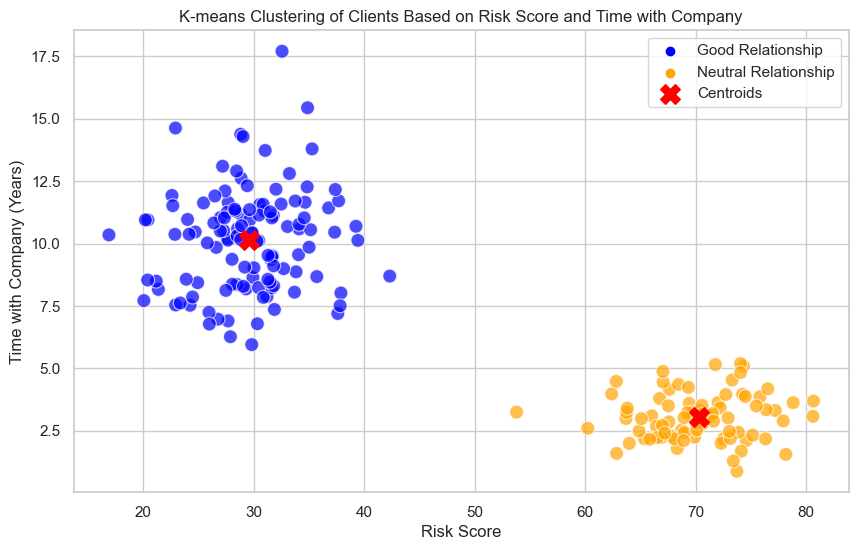

In [15]:
# Set plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='RiskScore', 
    y='TimeWithCompany', 
    hue='RelationshipQuality', 
    palette={'Good Relationship': 'blue', 'Neutral Relationship': 'orange'},
    data=data,
    s=100,
    alpha=0.7
)

# Plot the cluster centers
plt.scatter(
    cluster_centers_df['RiskScore'], 
    cluster_centers_df['TimeWithCompany'], 
    marker='X', 
    s=200, 
    c='red', 
    label='Centroids'
)

plt.title('K-means Clustering of Clients Based on Risk Score and Time with Company')
plt.xlabel('Risk Score')
plt.ylabel('Time with Company (Years)')
plt.legend()
plt.show()


Cluster 0 is labeled as 'Good Relationship'.
Cluster 1 is labeled as 'Neutral Relationship'.

Silhouette Score: 0.42


/Users/mubeen/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


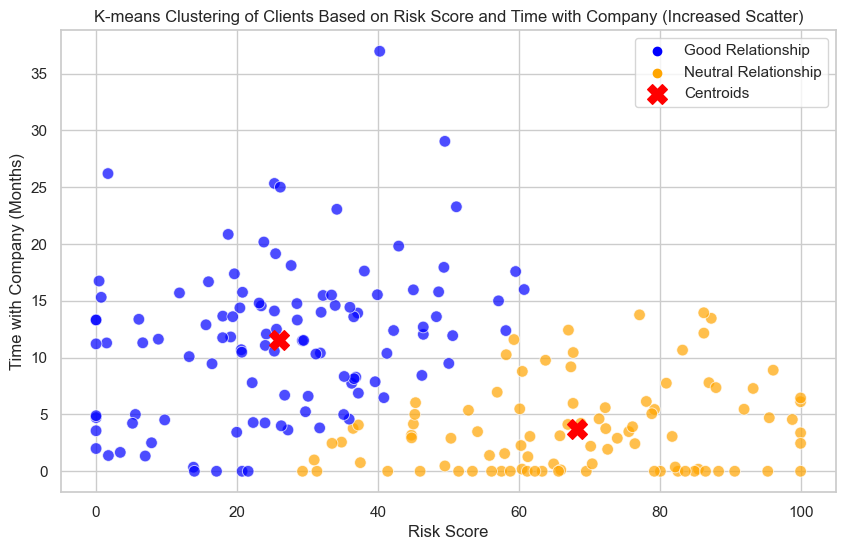

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

# Set random seed
np.random.seed(42)

# Generate sample data with more scatter
num_clients = 200

# Good Relationship clients
good_risk_score = np.random.normal(loc=30, scale=20, size=int(num_clients * 0.6))
good_time_with_company = np.random.normal(loc=10, scale=7, size=int(num_clients * 0.6))

# Neutral Relationship clients
neutral_risk_score = np.random.normal(loc=70, scale=20, size=int(num_clients * 0.4))
neutral_time_with_company = np.random.normal(loc=3, scale=5, size=int(num_clients * 0.4))

# Concatenate data
risk_score = np.concatenate((good_risk_score, neutral_risk_score))
time_with_company = np.concatenate((good_time_with_company, neutral_time_with_company))

# Create DataFrame
data = pd.DataFrame({
    'RiskScore': risk_score,
    'TimeWithCompany': time_with_company
})

# Clip values to keep them within reasonable bounds
data['RiskScore'] = data['RiskScore'].clip(0, 100)
data['TimeWithCompany'] = data['TimeWithCompany'].clip(0)

# Standardize features
features = ['RiskScore', 'TimeWithCompany']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)

# Assign relationship quality
if cluster_centers_df.loc[0, 'RiskScore'] < cluster_centers_df.loc[1, 'RiskScore']:
    good_cluster = 0
    neutral_cluster = 1
else:
    good_cluster = 1
    neutral_cluster = 0

data['RelationshipQuality'] = data['Cluster'].map({
    good_cluster: 'Good Relationship',
    neutral_cluster: 'Neutral Relationship'
})

print(f"\nCluster {good_cluster} is labeled as 'Good Relationship'.")
print(f"Cluster {neutral_cluster} is labeled as 'Neutral Relationship'.")

# Compute silhouette score
score = silhouette_score(data_scaled, data['Cluster'])
print(f"\nSilhouette Score: {score:.2f}")

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='RiskScore', 
    y='TimeWithCompany', 
    hue='RelationshipQuality', 
    palette={'Good Relationship': 'blue', 'Neutral Relationship': 'orange'},
    data=data,
    s=70,
    alpha=0.7
)

# Plot the cluster centers
plt.scatter(
    cluster_centers_df['RiskScore'], 
    cluster_centers_df['TimeWithCompany'], 
    marker='X', 
    s=200, 
    c='red', 
    label='Centroids'
)

plt.title('K-means Clustering of Clients Based on Risk Score and Time with Company (Increased Scatter)')
plt.xlabel('Risk Score')
plt.ylabel('Time with Company (Months)')
plt.legend()
plt.show()

Running simulation with default loading factor (10%)...


/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


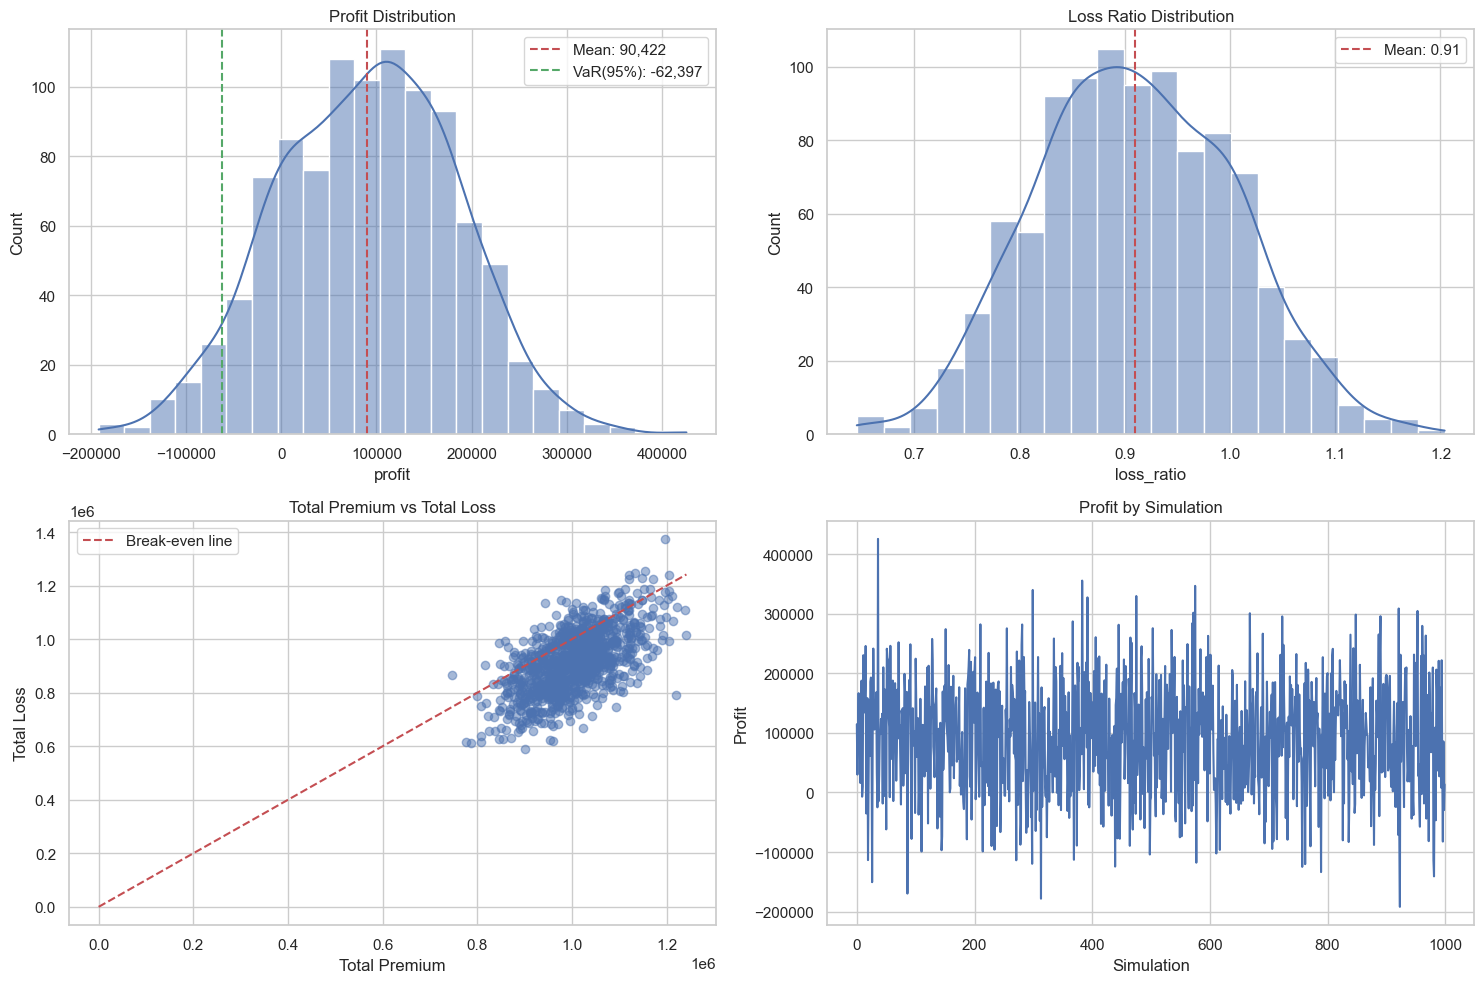


Portfolio Summary Statistics:
Average Profit: $90,422.27
Profit Standard Deviation: $93,008.31
Value at Risk (95%): $-62,396.52
Average Loss Ratio: 90.99%
Probability of Loss: 17.60%


In [18]:
import numpy as np
from scipy.stats import poisson, gamma
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def simulate_insurance_portfolio(n_policies=100, n_simulations=1000, loading_factor=0.1):
    # Parameters for different risk groups (5 pairs of lambda and gamma parameters)
    risk_groups = {
        'low_risk': {'lambda': 0.5, 'gamma_shape': 2.0, 'gamma_scale': 1000},
        'medium_low_risk': {'lambda': 1.0, 'gamma_shape': 2.2, 'gamma_scale': 1500},
        'medium_risk': {'lambda': 1.5, 'gamma_shape': 2.4, 'gamma_scale': 2000},
        'medium_high_risk': {'lambda': 2.0, 'gamma_shape': 2.6, 'gamma_scale': 2500},
        'high_risk': {'lambda': 2.5, 'gamma_shape': 2.8, 'gamma_scale': 3000}
    }
    
    # Pre-calculate premiums
    premiums = {group: params['lambda'] * params['gamma_shape'] * params['gamma_scale'] * (1 + loading_factor)
                for group, params in risk_groups.items()}
    
    # Pre-generate risk group assignments
    risk_group_names = list(risk_groups.keys())
    risk_assignments = np.random.choice(risk_group_names, size=(n_simulations, n_policies))
    
    results = []
    for sim in range(n_simulations):
        total_premium = 0
        total_loss = 0
        
        for policy_idx in range(n_policies):
            risk_group = risk_assignments[sim, policy_idx]
            params = risk_groups[risk_group]
            
            # Add premium
            total_premium += premiums[risk_group]
            
            # Generate claims using vectorized operations
            n_claims = poisson.rvs(params['lambda'])
            if n_claims > 0:
                claims = gamma.rvs(a=params['gamma_shape'], 
                                 scale=params['gamma_scale'], 
                                 size=n_claims)
                total_loss += claims.sum()
        
        profit = total_premium - total_loss
        results.append({
            'simulation': sim,
            'total_premium': total_premium,
            'total_loss': total_loss,
            'profit': profit,
            'loss_ratio': total_loss / total_premium if total_premium > 0 else np.inf
        })
    
    return pd.DataFrame(results)

def analyze_results(results_df):
    # Calculate key metrics
    avg_profit = results_df['profit'].mean()
    profit_std = results_df['profit'].std()
    var_95 = np.percentile(results_df['profit'], 5)
    avg_loss_ratio = results_df['loss_ratio'].mean()
    
    # Create visualization plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Profit distribution
    sns.histplot(data=results_df, x='profit', kde=True, ax=axes[0,0])
    axes[0,0].axvline(x=avg_profit, color='r', linestyle='--', label=f'Mean: {avg_profit:,.0f}')
    axes[0,0].axvline(x=var_95, color='g', linestyle='--', label=f'VaR(95%): {var_95:,.0f}')
    axes[0,0].set_title('Profit Distribution')
    axes[0,0].legend()
    
    # Loss ratio distribution
    sns.histplot(data=results_df, x='loss_ratio', kde=True, ax=axes[0,1])
    axes[0,1].axvline(x=avg_loss_ratio, color='r', linestyle='--', label=f'Mean: {avg_loss_ratio:.2f}')
    axes[0,1].set_title('Loss Ratio Distribution')
    axes[0,1].legend()
    
    # Premium vs Loss scatter
    axes[1,0].scatter(results_df['total_premium'], results_df['total_loss'], alpha=0.5)
    axes[1,0].plot([0, results_df['total_premium'].max()], [0, results_df['total_premium'].max()], 
                   'r--', label='Break-even line')
    axes[1,0].set_title('Total Premium vs Total Loss')
    axes[1,0].set_xlabel('Total Premium')
    axes[1,0].set_ylabel('Total Loss')
    axes[1,0].legend()
    
    # Profit over simulations
    axes[1,1].plot(results_df['simulation'], results_df['profit'])
    axes[1,1].set_title('Profit by Simulation')
    axes[1,1].set_xlabel('Simulation')
    axes[1,1].set_ylabel('Profit')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nPortfolio Summary Statistics:")
    print(f"Average Profit: ${avg_profit:,.2f}")
    print(f"Profit Standard Deviation: ${profit_std:,.2f}")
    print(f"Value at Risk (95%): ${var_95:,.2f}")
    print(f"Average Loss Ratio: {avg_loss_ratio:.2%}")
    print(f"Probability of Loss: {(results_df['profit'] < 0).mean():.2%}")
    
    return {
        'avg_profit': avg_profit,
        'profit_std': profit_std,
        'var_95': var_95,
        'avg_loss_ratio': avg_loss_ratio,
        'prob_loss': (results_df['profit'] < 0).mean()
    }

# Run simulation with different loading factors
def compare_loading_factors(loading_factors=[0.05, 0.1, 0.15, 0.2, 0.25]):
    results = []
    for lf in loading_factors:
        print(f"\nSimulating with loading factor: {lf:.2%}")
        df = simulate_insurance_portfolio(loading_factor=lf)
        metrics = analyze_results(df)
        metrics['loading_factor'] = lf
        results.append(metrics)
    
    return pd.DataFrame(results)

# Run the analysis
if __name__ == "__main__":
    print("Running simulation with default loading factor (10%)...")
    results_df = simulate_insurance_portfolio()
    analyze_results(results_df)

Running simulation with 5 policies...


/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


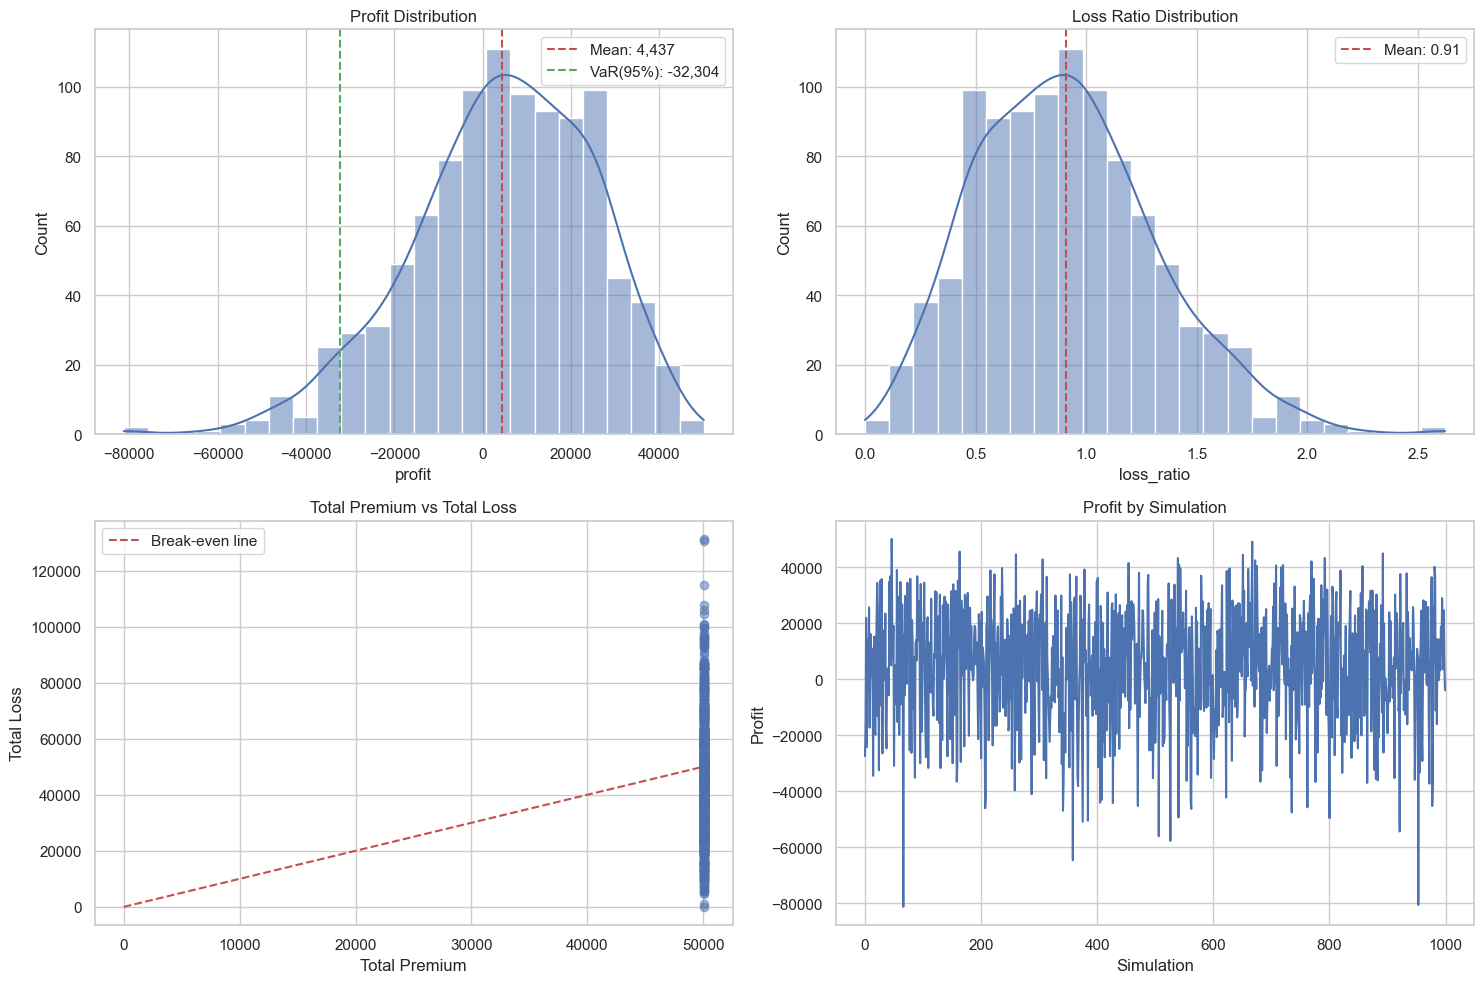


Portfolio Summary Statistics:
Average Profit: $4,436.62
Profit Standard Deviation: $20,424.00
Value at Risk (95%): $-32,303.55
Average Loss Ratio: 91.14%
Probability of Loss: 38.20%

Example of first simulation details:

Risk Group: low_risk
Premium: $1,100.00
Number of Claims: 0
Total Loss: $0.00

Risk Group: medium_low_risk
Premium: $3,630.00
Number of Claims: 0
Total Loss: $0.00

Risk Group: medium_risk
Premium: $7,920.00
Number of Claims: 2
Total Loss: $9,789.28

Risk Group: medium_high_risk
Premium: $14,300.00
Number of Claims: 4
Total Loss: $22,175.25

Risk Group: high_risk
Premium: $23,100.00
Number of Claims: 4
Total Loss: $45,537.82


In [19]:
import numpy as np
from scipy.stats import poisson, gamma
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def simulate_insurance_portfolio(n_policies=5, n_simulations=1000, loading_factor=0.1):
    # 5 pairs of lambda and gamma parameters
    risk_groups = {
        'low_risk': {'lambda': 0.5, 'gamma_shape': 2.0, 'gamma_scale': 1000},
        'medium_low_risk': {'lambda': 1.0, 'gamma_shape': 2.2, 'gamma_scale': 1500},
        'medium_risk': {'lambda': 1.5, 'gamma_shape': 2.4, 'gamma_scale': 2000},
        'medium_high_risk': {'lambda': 2.0, 'gamma_shape': 2.6, 'gamma_scale': 2500},
        'high_risk': {'lambda': 2.5, 'gamma_shape': 2.8, 'gamma_scale': 3000}
    }
    
    # Pre-calculate premiums
    premiums = {group: params['lambda'] * params['gamma_shape'] * params['gamma_scale'] * (1 + loading_factor)
                for group, params in risk_groups.items()}
    
    # Instead of random assignment, assign one policy to each risk group
    risk_group_names = list(risk_groups.keys())
    
    results = []
    for sim in range(n_simulations):
        total_premium = 0
        total_loss = 0
        
        # Detailed information for this simulation
        simulation_details = {
            'simulation': sim,
            'policies': []
        }
        
        # Assign exactly one policy to each risk group
        for policy_idx in range(n_policies):
            risk_group = risk_group_names[policy_idx]
            params = risk_groups[risk_group]
            
            policy_premium = premiums[risk_group]
            total_premium += policy_premium
            
            n_claims = poisson.rvs(params['lambda'])
            policy_loss = 0
            
            if n_claims > 0:
                claims = gamma.rvs(a=params['gamma_shape'], 
                                 scale=params['gamma_scale'], 
                                 size=n_claims)
                policy_loss = claims.sum()
            
            total_loss += policy_loss
            
            # Store detailed information for this policy
            simulation_details['policies'].append({
                'risk_group': risk_group,
                'premium': policy_premium,
                'n_claims': n_claims,
                'loss': policy_loss
            })
        
        profit = total_premium - total_loss
        results.append({
            'simulation': sim,
            'total_premium': total_premium,
            'total_loss': total_loss,
            'profit': profit,
            'loss_ratio': total_loss / total_premium if total_premium > 0 else np.inf,
            'details': simulation_details
        })
    
    return pd.DataFrame(results)

def analyze_results(results_df):
    # Calculate key metrics
    avg_profit = results_df['profit'].mean()
    profit_std = results_df['profit'].std()
    var_95 = np.percentile(results_df['profit'], 5)
    avg_loss_ratio = results_df['loss_ratio'].mean()
    
    # Create visualization plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Profit distribution
    sns.histplot(data=results_df, x='profit', kde=True, ax=axes[0,0])
    axes[0,0].axvline(x=avg_profit, color='r', linestyle='--', label=f'Mean: {avg_profit:,.0f}')
    axes[0,0].axvline(x=var_95, color='g', linestyle='--', label=f'VaR(95%): {var_95:,.0f}')
    axes[0,0].set_title('Profit Distribution')
    axes[0,0].legend()
    
    # Loss ratio distribution
    sns.histplot(data=results_df, x='loss_ratio', kde=True, ax=axes[0,1])
    axes[0,1].axvline(x=avg_loss_ratio, color='r', linestyle='--', label=f'Mean: {avg_loss_ratio:.2f}')
    axes[0,1].set_title('Loss Ratio Distribution')
    axes[0,1].legend()
    
    # Premium vs Loss scatter
    axes[1,0].scatter(results_df['total_premium'], results_df['total_loss'], alpha=0.5)
    axes[1,0].plot([0, results_df['total_premium'].max()], [0, results_df['total_premium'].max()], 
                   'r--', label='Break-even line')
    axes[1,0].set_title('Total Premium vs Total Loss')
    axes[1,0].set_xlabel('Total Premium')
    axes[1,0].set_ylabel('Total Loss')
    axes[1,0].legend()
    
    # Profit over simulations
    axes[1,1].plot(results_df['simulation'], results_df['profit'])
    axes[1,1].set_title('Profit by Simulation')
    axes[1,1].set_xlabel('Simulation')
    axes[1,1].set_ylabel('Profit')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nPortfolio Summary Statistics:")
    print(f"Average Profit: ${avg_profit:,.2f}")
    print(f"Profit Standard Deviation: ${profit_std:,.2f}")
    print(f"Value at Risk (95%): ${var_95:,.2f}")
    print(f"Average Loss Ratio: {avg_loss_ratio:.2%}")
    print(f"Probability of Loss: {(results_df['profit'] < 0).mean():.2%}")
    
    # Print first simulation details for better understanding
    print("\nExample of first simulation details:")
    first_sim = results_df.iloc[0]
    for policy in first_sim['details']['policies']:
        print(f"\nRisk Group: {policy['risk_group']}")
        print(f"Premium: ${policy['premium']:,.2f}")
        print(f"Number of Claims: {policy['n_claims']}")
        print(f"Total Loss: ${policy['loss']:,.2f}")
    
    return {
        'avg_profit': avg_profit,
        'profit_std': profit_std,
        'var_95': var_95,
        'avg_loss_ratio': avg_loss_ratio,
        'prob_loss': (results_df['profit'] < 0).mean()
    }

# Run the analysis
if __name__ == "__main__":
    print("Running simulation with 5 policies...")
    results_df = simulate_insurance_portfolio()
    analyze_results(results_df)

Running simulation with 5 policies...


/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


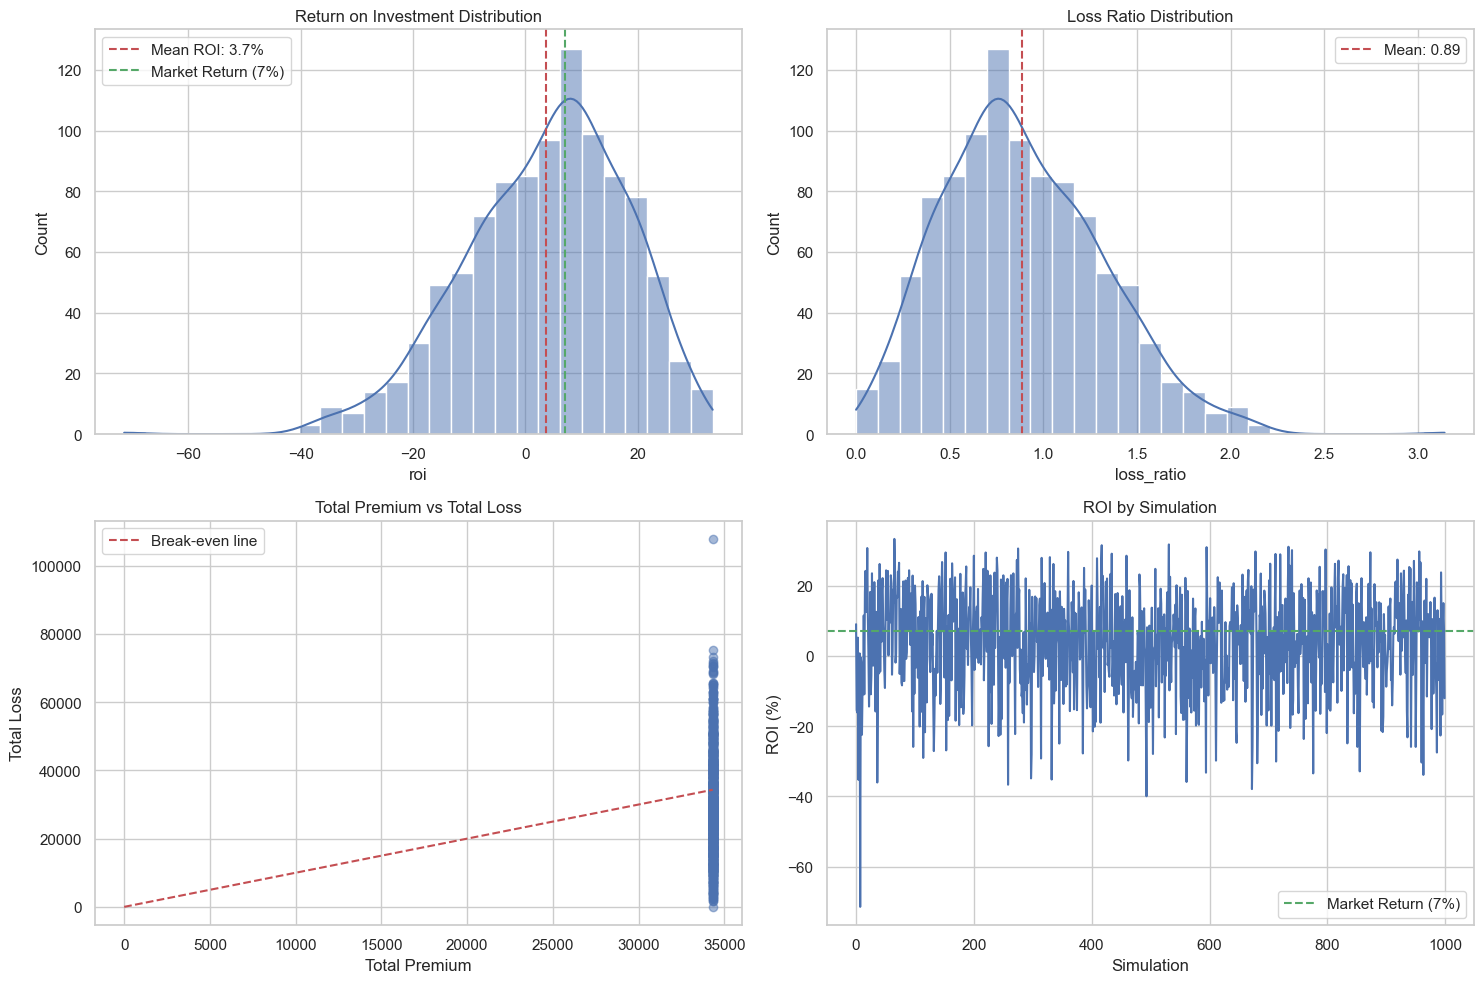


Portfolio Summary Statistics:
Average Return on Investment: 3.71%
Market Return: 7.00%
Outperformance: -3.29%
Average Profit: $3,819.54
Profit Standard Deviation: $14,614.75
Value at Risk (95%): $-21,962.87
Average Loss Ratio: 88.87%
Probability of Loss: 36.60%

Example of first simulation details:

Initial Capital Required: $102,950.40

Risk Group: low_risk
Premium: $806.40
Number of Claims: 0
Total Loss: $0.00

Risk Group: medium_low_risk
Premium: $2,562.56
Number of Claims: 2
Total Loss: $5,565.17

Risk Group: medium_risk
Premium: $5,483.52
Number of Claims: 0
Total Loss: $0.00

Risk Group: medium_high_risk
Premium: $9,784.32
Number of Claims: 3
Total Loss: $14,059.93

Risk Group: high_risk
Premium: $15,680.00
Number of Claims: 1
Total Loss: $5,385.02


In [20]:
import numpy as np
from scipy.stats import poisson, gamma
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def simulate_insurance_portfolio(n_policies=5, n_simulations=1000, loading_factor=0.12):  # Increased loading factor
    # Adjusted parameters to achieve ~8-9% return
    risk_groups = {
        'low_risk': {'lambda': 0.4, 'gamma_shape': 2.0, 'gamma_scale': 900},        # Reduced risk
        'medium_low_risk': {'lambda': 0.8, 'gamma_shape': 2.2, 'gamma_scale': 1300},
        'medium_risk': {'lambda': 1.2, 'gamma_shape': 2.4, 'gamma_scale': 1700},
        'medium_high_risk': {'lambda': 1.6, 'gamma_shape': 2.6, 'gamma_scale': 2100},
        'high_risk': {'lambda': 2.0, 'gamma_shape': 2.8, 'gamma_scale': 2500}       # Reduced risk
    }
    
    # Pre-calculate premiums
    premiums = {group: params['lambda'] * params['gamma_shape'] * params['gamma_scale'] * (1 + loading_factor)
                for group, params in risk_groups.items()}
    
    risk_group_names = list(risk_groups.keys())
    
    results = []
    for sim in range(n_simulations):
        total_premium = 0
        total_loss = 0
        initial_capital = 0  # We'll calculate this based on premiums
        
        simulation_details = {
            'simulation': sim,
            'policies': []
        }
        
        for policy_idx in range(n_policies):
            risk_group = risk_group_names[policy_idx]
            params = risk_groups[risk_group]
            
            policy_premium = premiums[risk_group]
            total_premium += policy_premium
            
            n_claims = poisson.rvs(params['lambda'])
            policy_loss = 0
            
            if n_claims > 0:
                claims = gamma.rvs(a=params['gamma_shape'], 
                                 scale=params['gamma_scale'], 
                                 size=n_claims)
                policy_loss = claims.sum()
            
            total_loss += policy_loss
            
            simulation_details['policies'].append({
                'risk_group': risk_group,
                'premium': policy_premium,
                'n_claims': n_claims,
                'loss': policy_loss
            })
        
        # Calculate required capital as 3 times the expected annual premium
        initial_capital = total_premium * 3
        
        profit = total_premium - total_loss
        roi = (profit / initial_capital) * 100  # Return on Investment as percentage
        
        results.append({
            'simulation': sim,
            'total_premium': total_premium,
            'total_loss': total_loss,
            'initial_capital': initial_capital,
            'profit': profit,
            'roi': roi,
            'loss_ratio': total_loss / total_premium if total_premium > 0 else np.inf,
            'details': simulation_details
        })
    
    return pd.DataFrame(results)

def analyze_results(results_df):
    # Calculate key metrics
    avg_profit = results_df['profit'].mean()
    profit_std = results_df['profit'].std()
    var_95 = np.percentile(results_df['profit'], 5)
    avg_loss_ratio = results_df['loss_ratio'].mean()
    avg_roi = results_df['roi'].mean()
    
    # Create visualization plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # ROI distribution
    sns.histplot(data=results_df, x='roi', kde=True, ax=axes[0,0])
    axes[0,0].axvline(x=avg_roi, color='r', linestyle='--', label=f'Mean ROI: {avg_roi:.1f}%')
    axes[0,0].axvline(x=7, color='g', linestyle='--', label='Market Return (7%)')
    axes[0,0].set_title('Return on Investment Distribution')
    axes[0,0].legend()
    
    # Loss ratio distribution
    sns.histplot(data=results_df, x='loss_ratio', kde=True, ax=axes[0,1])
    axes[0,1].axvline(x=avg_loss_ratio, color='r', linestyle='--', label=f'Mean: {avg_loss_ratio:.2f}')
    axes[0,1].set_title('Loss Ratio Distribution')
    axes[0,1].legend()
    
    # Premium vs Loss scatter
    axes[1,0].scatter(results_df['total_premium'], results_df['total_loss'], alpha=0.5)
    axes[1,0].plot([0, results_df['total_premium'].max()], [0, results_df['total_premium'].max()], 
                   'r--', label='Break-even line')
    axes[1,0].set_title('Total Premium vs Total Loss')
    axes[1,0].set_xlabel('Total Premium')
    axes[1,0].set_ylabel('Total Loss')
    axes[1,0].legend()
    
    # ROI over simulations
    axes[1,1].plot(results_df['simulation'], results_df['roi'])
    axes[1,1].axhline(y=7, color='g', linestyle='--', label='Market Return (7%)')
    axes[1,1].set_title('ROI by Simulation')
    axes[1,1].set_xlabel('Simulation')
    axes[1,1].set_ylabel('ROI (%)')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nPortfolio Summary Statistics:")
    print(f"Average Return on Investment: {avg_roi:.2f}%")
    print(f"Market Return: 7.00%")
    print(f"Outperformance: {avg_roi - 7:.2f}%")
    print(f"Average Profit: ${avg_profit:,.2f}")
    print(f"Profit Standard Deviation: ${profit_std:,.2f}")
    print(f"Value at Risk (95%): ${var_95:,.2f}")
    print(f"Average Loss Ratio: {avg_loss_ratio:.2%}")
    print(f"Probability of Loss: {(results_df['profit'] < 0).mean():.2%}")
    
    # Print first simulation details
    print("\nExample of first simulation details:")
    first_sim = results_df.iloc[0]
    print(f"\nInitial Capital Required: ${first_sim['initial_capital']:,.2f}")
    for policy in first_sim['details']['policies']:
        print(f"\nRisk Group: {policy['risk_group']}")
        print(f"Premium: ${policy['premium']:,.2f}")
        print(f"Number of Claims: {policy['n_claims']}")
        print(f"Total Loss: ${policy['loss']:,.2f}")
    
    return {
        'avg_roi': avg_roi,
        'avg_profit': avg_profit,
        'profit_std': profit_std,
        'var_95': var_95,
        'avg_loss_ratio': avg_loss_ratio,
        'prob_loss': (results_df['profit'] < 0).mean()
    }

# Run the analysis
if __name__ == "__main__":
    print("Running simulation with 5 policies...")
    results_df = simulate_insurance_portfolio()
    analyze_results(results_df)

Running simulation with 5 policies...


/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


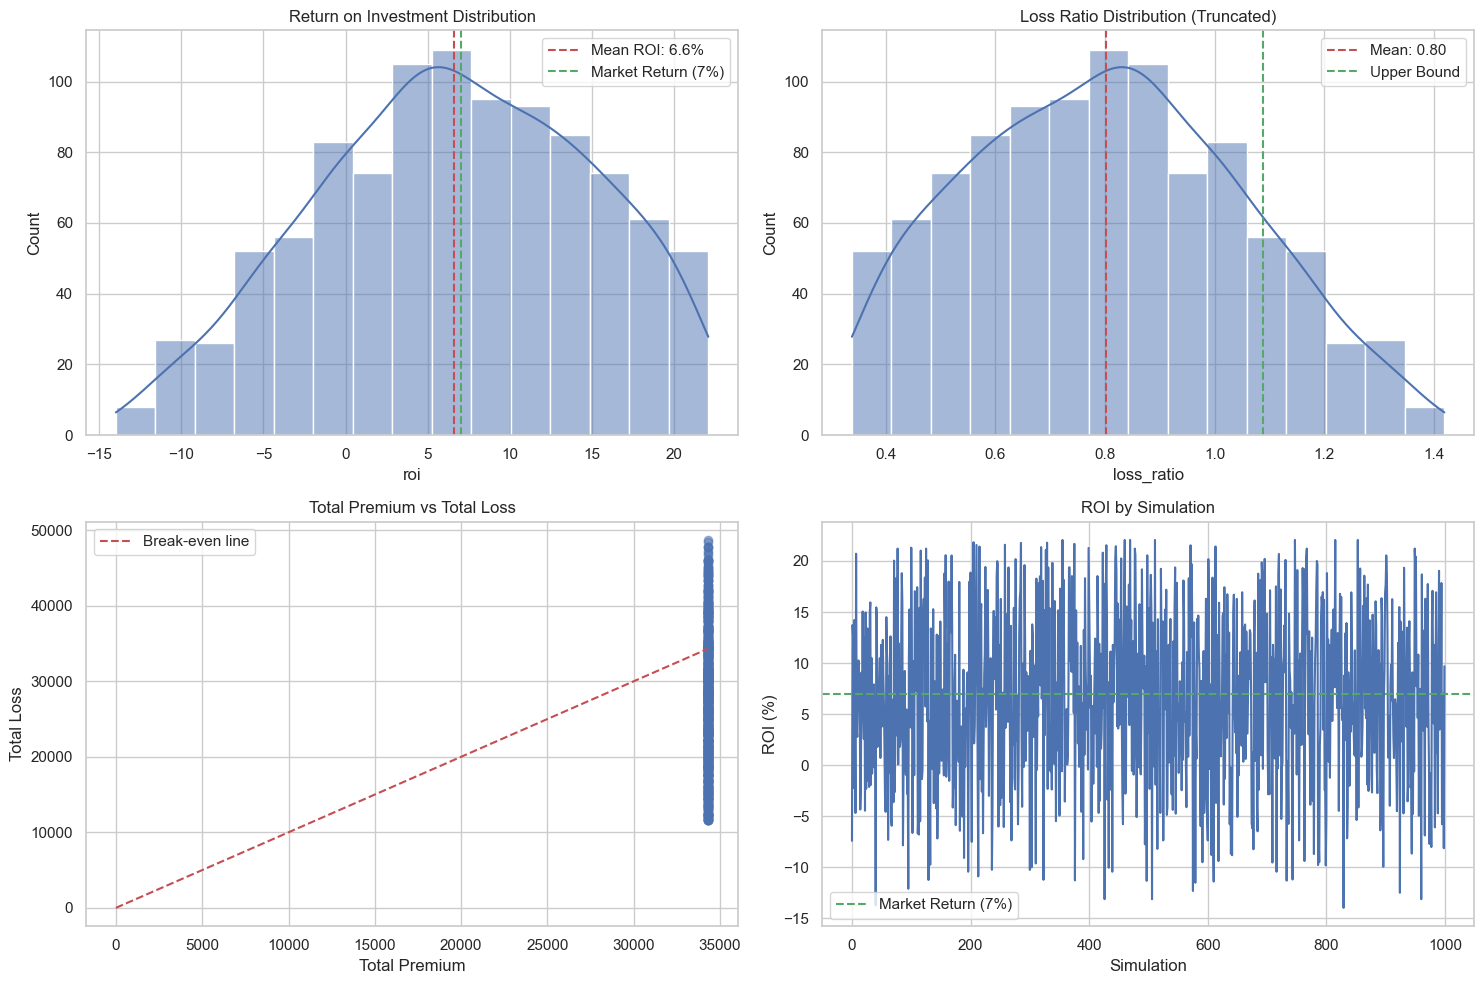


Portfolio Summary Statistics:
Average Return on Investment: 6.58%
Market Return: 7.00%
Outperformance: -0.42%
Average Profit: $6,773.38
Profit Standard Deviation: $8,527.68
Value at Risk (95%): $-7,591.12
Average Loss Ratio: 80.26%
Loss Ratio Bounds: [0.50, 1.10]
Probability of Loss: 23.40%


In [27]:
import numpy as np
from scipy.stats import poisson, gamma, truncnorm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def simulate_insurance_portfolio(n_policies=5, n_simulations=1000, loading_factor=0.12, trunc_std=1.2):
    risk_groups = {
        'low_risk': {'lambda': 0.4, 'gamma_shape': 2.0, 'gamma_scale': 900},
        'medium_low_risk': {'lambda': 0.8, 'gamma_shape': 2.2, 'gamma_scale': 1300},
        'medium_risk': {'lambda': 1.2, 'gamma_shape': 2.4, 'gamma_scale': 1700},
        'medium_high_risk': {'lambda': 1.6, 'gamma_shape': 2.6, 'gamma_scale': 2100},
        'high_risk': {'lambda': 2.0, 'gamma_shape': 2.8, 'gamma_scale': 2500}
    }
    
    premiums = {group: params['lambda'] * params['gamma_shape'] * params['gamma_scale'] * (1 + loading_factor)
                for group, params in risk_groups.items()}
    
    risk_group_names = list(risk_groups.keys())
    
    results = []
    raw_loss_ratios = []
    
    # First pass to collect loss ratios for truncation
    for sim in range(n_simulations):
        total_premium = 0
        total_loss = 0
        
        for policy_idx in range(n_policies):
            risk_group = risk_group_names[policy_idx]
            params = risk_groups[risk_group]
            
            policy_premium = premiums[risk_group]
            total_premium += policy_premium
            
            n_claims = poisson.rvs(params['lambda'])
            policy_loss = 0
            
            if n_claims > 0:
                claims = gamma.rvs(a=params['gamma_shape'], 
                                 scale=params['gamma_scale'], 
                                 size=n_claims)
                policy_loss = claims.sum()
            
            total_loss += policy_loss
        
        loss_ratio = total_loss / total_premium if total_premium > 0 else np.inf
        raw_loss_ratios.append(loss_ratio)
    
    # Calculate truncation bounds
    lr_mean = np.mean(raw_loss_ratios)
    lr_std = np.std(raw_loss_ratios)
    lower_bound = lr_mean - trunc_std * lr_std
    upper_bound = lr_mean + trunc_std * lr_std
    
    # Second pass with truncation
    results = []
    for sim in range(n_simulations):
        total_premium = 0
        total_loss = 0
        initial_capital = 0
        
        simulation_details = {
            'simulation': sim,
            'policies': []
        }
        
        for policy_idx in range(n_policies):
            risk_group = risk_group_names[policy_idx]
            params = risk_groups[risk_group]
            
            policy_premium = premiums[risk_group]
            total_premium += policy_premium
            
            n_claims = poisson.rvs(params['lambda'])
            policy_loss = 0
            
            if n_claims > 0:
                claims = gamma.rvs(a=params['gamma_shape'], 
                                 scale=params['gamma_scale'], 
                                 size=n_claims)
                policy_loss = claims.sum()
            
            # Truncate individual policy loss ratio
            policy_loss_ratio = policy_loss / policy_premium
            if policy_loss_ratio > upper_bound:
                policy_loss = upper_bound * policy_premium
            elif policy_loss_ratio < lower_bound:
                policy_loss = lower_bound * policy_premium
            
            total_loss += policy_loss
            
            simulation_details['policies'].append({
                'risk_group': risk_group,
                'premium': policy_premium,
                'n_claims': n_claims,
                'loss': policy_loss
            })
        
        initial_capital = total_premium * 3
        profit = total_premium - total_loss
        roi = (profit / initial_capital) * 100
        
        results.append({
            'simulation': sim,
            'total_premium': total_premium,
            'total_loss': total_loss,
            'initial_capital': initial_capital,
            'profit': profit,
            'roi': roi,
            'loss_ratio': total_loss / total_premium if total_premium > 0 else np.inf,
            'details': simulation_details
        })
    
    return pd.DataFrame(results)

def analyze_results(results_df):
    avg_profit = results_df['profit'].mean()
    profit_std = results_df['profit'].std()
    var_95 = np.percentile(results_df['profit'], 5)
    avg_loss_ratio = results_df['loss_ratio'].mean()
    avg_roi = results_df['roi'].mean()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # ROI distribution
    sns.histplot(data=results_df, x='roi', kde=True, ax=axes[0,0])
    axes[0,0].axvline(x=avg_roi, color='r', linestyle='--', label=f'Mean ROI: {avg_roi:.1f}%')
    axes[0,0].axvline(x=7, color='g', linestyle='--', label='Market Return (7%)')
    axes[0,0].set_title('Return on Investment Distribution')
    axes[0,0].legend()
    
    # Loss ratio distribution with truncation bounds
    sns.histplot(data=results_df, x='loss_ratio', kde=True, ax=axes[0,1])
    lr_mean = results_df['loss_ratio'].mean()
    lr_std = results_df['loss_ratio'].std()
    axes[0,1].axvline(x=lr_mean, color='r', linestyle='--', label=f'Mean: {lr_mean:.2f}')
    # axes[0,1].axvline(x=lr_mean - 1.15*lr_std, color='g', linestyle='--', label='Lower Bound')
    axes[0,1].axvline(x=lr_mean + 1.15*lr_std, color='g', linestyle='--', label='Upper Bound')
    axes[0,1].set_title('Loss Ratio Distribution (Truncated)')
    axes[0,1].legend()
    
    # Premium vs Loss scatter
    axes[1,0].scatter(results_df['total_premium'], results_df['total_loss'], alpha=0.5)
    axes[1,0].plot([0, results_df['total_premium'].max()], [0, results_df['total_premium'].max()], 
                   'r--', label='Break-even line')
    axes[1,0].set_title('Total Premium vs Total Loss')
    axes[1,0].set_xlabel('Total Premium')
    axes[1,0].set_ylabel('Total Loss')
    axes[1,0].legend()
    
    # ROI over simulations
    axes[1,1].plot(results_df['simulation'], results_df['roi'])
    axes[1,1].axhline(y=7, color='g', linestyle='--', label='Market Return (7%)')
    axes[1,1].set_title('ROI by Simulation')
    axes[1,1].set_xlabel('Simulation')
    axes[1,1].set_ylabel('ROI (%)')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\nPortfolio Summary Statistics:")
    print(f"Average Return on Investment: {avg_roi:.2f}%")
    print(f"Market Return: 7.00%")
    print(f"Outperformance: {avg_roi - 7:.2f}%")
    print(f"Average Profit: ${avg_profit:,.2f}")
    print(f"Profit Standard Deviation: ${profit_std:,.2f}")
    print(f"Value at Risk (95%): ${var_95:,.2f}")
    print(f"Average Loss Ratio: {avg_loss_ratio:.2%}")
    print(f"Loss Ratio Bounds: [{lr_mean - 1.2*lr_std:.2f}, {lr_mean + 1.2*lr_std:.2f}]")
    print(f"Probability of Loss: {(results_df['profit'] < 0).mean():.2%}")
    
    return {
        'avg_roi': avg_roi,
        'avg_profit': avg_profit,
        'profit_std': profit_std,
        'var_95': var_95,
        'avg_loss_ratio': avg_loss_ratio,
        'prob_loss': (results_df['profit'] < 0).mean()
    }

# Run the analysis
if __name__ == "__main__":
    print("Running simulation with 5 policies...")
    results_df = simulate_insurance_portfolio()
    analyze_results(results_df)

Running simulation with 5 policies...


/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mubeen/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


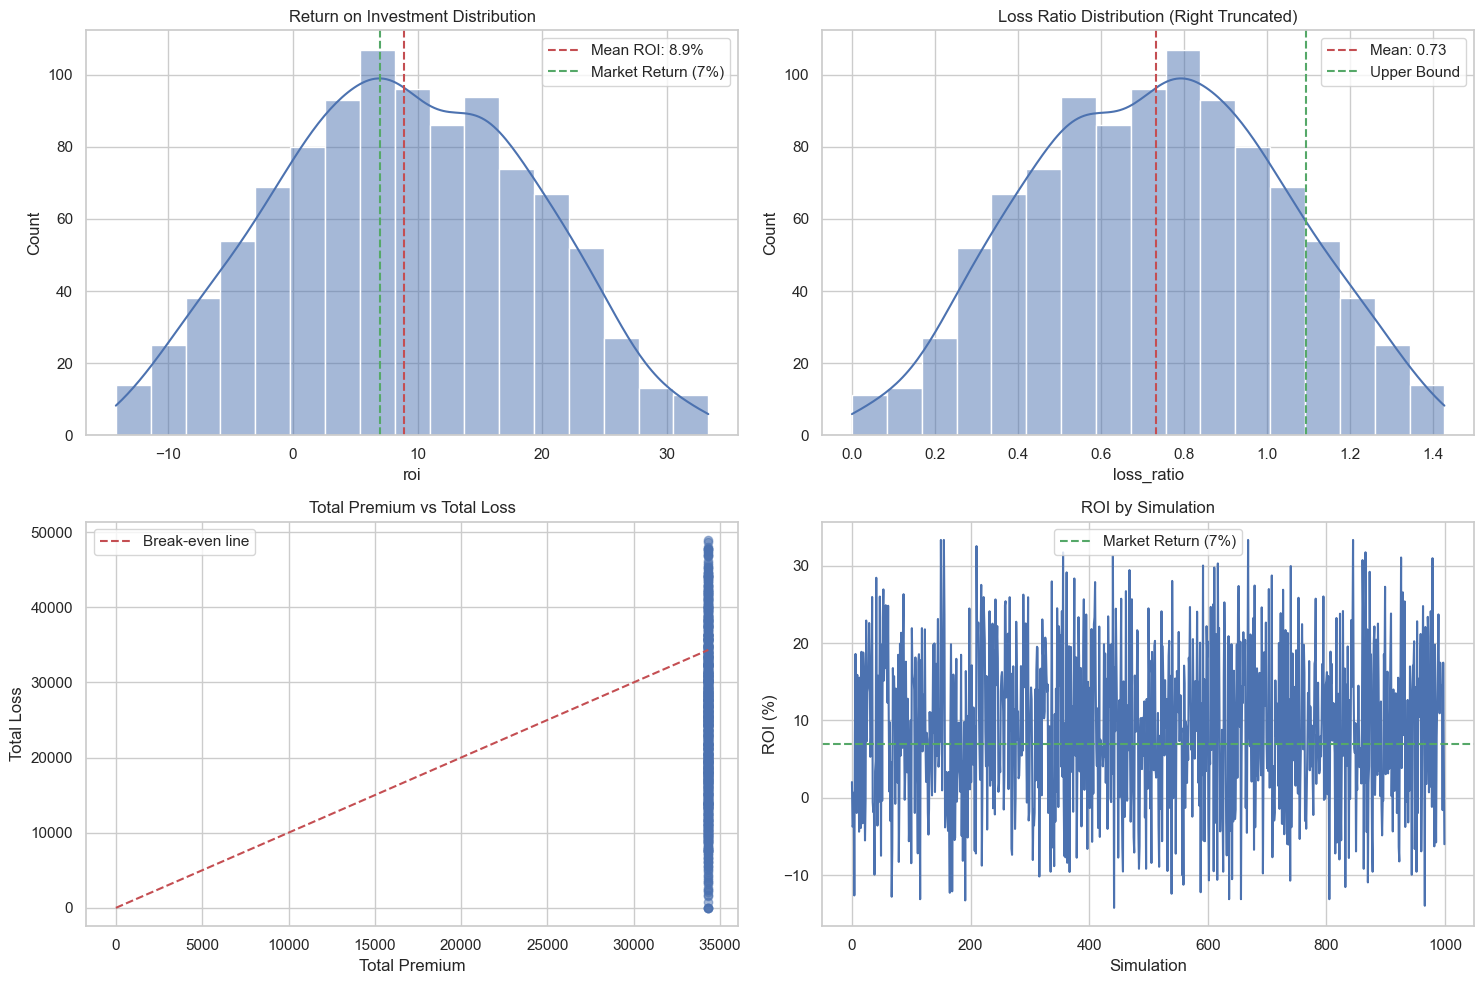


Portfolio Summary Statistics:
Average Return on Investment: 8.91%
Market Return: 7.00%
Outperformance: 1.91%
Average Profit: $9,172.92
Profit Standard Deviation: $10,321.85
Value at Risk (95%): $-7,907.21
Average Loss Ratio: 73.27%
Loss Ratio Upper Bound: 1.09
Probability of Loss: 20.40%


In [28]:
import numpy as np
from scipy.stats import poisson, gamma
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def simulate_insurance_portfolio(n_policies=5, n_simulations=1000, loading_factor=0.12, trunc_std=1.2):
    risk_groups = {
        'low_risk': {'lambda': 0.4, 'gamma_shape': 2.0, 'gamma_scale': 900},
        'medium_low_risk': {'lambda': 0.8, 'gamma_shape': 2.2, 'gamma_scale': 1300},
        'medium_risk': {'lambda': 1.2, 'gamma_shape': 2.4, 'gamma_scale': 1700},
        'medium_high_risk': {'lambda': 1.6, 'gamma_shape': 2.6, 'gamma_scale': 2100},
        'high_risk': {'lambda': 2.0, 'gamma_shape': 2.8, 'gamma_scale': 2500}
    }
    
    premiums = {group: params['lambda'] * params['gamma_shape'] * params['gamma_scale'] * (1 + loading_factor)
                for group, params in risk_groups.items()}
    
    risk_group_names = list(risk_groups.keys())
    
    # First pass to calculate loss ratio statistics
    raw_loss_ratios = []
    for sim in range(n_simulations):
        total_premium = 0
        total_loss = 0
        
        for policy_idx in range(n_policies):
            risk_group = risk_group_names[policy_idx]
            params = risk_groups[risk_group]
            
            policy_premium = premiums[risk_group]
            total_premium += policy_premium
            
            n_claims = poisson.rvs(params['lambda'])
            policy_loss = 0
            
            if n_claims > 0:
                claims = gamma.rvs(a=params['gamma_shape'], 
                                 scale=params['gamma_scale'], 
                                 size=n_claims)
                policy_loss = claims.sum()
            
            total_loss += policy_loss
        
        loss_ratio = total_loss / total_premium if total_premium > 0 else np.inf
        raw_loss_ratios.append(loss_ratio)
    
    # Calculate right truncation threshold
    lr_mean = np.mean(raw_loss_ratios)
    lr_std = np.std(raw_loss_ratios)
    upper_bound = lr_mean + trunc_std * lr_std
    
    # Second pass with right truncation
    results = []
    for sim in range(n_simulations):
        total_premium = 0
        total_loss = 0
        
        simulation_details = {
            'simulation': sim,
            'policies': []
        }
        
        for policy_idx in range(n_policies):
            risk_group = risk_group_names[policy_idx]
            params = risk_groups[risk_group]
            
            policy_premium = premiums[risk_group]
            total_premium += policy_premium
            
            n_claims = poisson.rvs(params['lambda'])
            policy_loss = 0
            
            if n_claims > 0:
                claims = gamma.rvs(a=params['gamma_shape'], 
                                 scale=params['gamma_scale'], 
                                 size=n_claims)
                policy_loss = claims.sum()
            
            # Apply right truncation only
            policy_loss_ratio = policy_loss / policy_premium
            if policy_loss_ratio > upper_bound:
                policy_loss = upper_bound * policy_premium
            
            total_loss += policy_loss
            
            simulation_details['policies'].append({
                'risk_group': risk_group,
                'premium': policy_premium,
                'n_claims': n_claims,
                'loss': policy_loss
            })
        
        initial_capital = total_premium * 3
        profit = total_premium - total_loss
        roi = (profit / initial_capital) * 100
        
        results.append({
            'simulation': sim,
            'total_premium': total_premium,
            'total_loss': total_loss,
            'initial_capital': initial_capital,
            'profit': profit,
            'roi': roi,
            'loss_ratio': total_loss / total_premium if total_premium > 0 else np.inf,
            'details': simulation_details
        })
    
    return pd.DataFrame(results)

def analyze_results(results_df):
    avg_profit = results_df['profit'].mean()
    profit_std = results_df['profit'].std()
    var_95 = np.percentile(results_df['profit'], 5)
    avg_loss_ratio = results_df['loss_ratio'].mean()
    avg_roi = results_df['roi'].mean()
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # ROI distribution
    sns.histplot(data=results_df, x='roi', kde=True, ax=axes[0,0])
    axes[0,0].axvline(x=avg_roi, color='r', linestyle='--', label=f'Mean ROI: {avg_roi:.1f}%')
    axes[0,0].axvline(x=7, color='g', linestyle='--', label='Market Return (7%)')
    axes[0,0].set_title('Return on Investment Distribution')
    axes[0,0].legend()
    
    # Loss ratio distribution with right truncation bound
    sns.histplot(data=results_df, x='loss_ratio', kde=True, ax=axes[0,1])
    lr_mean = results_df['loss_ratio'].mean()
    lr_std = results_df['loss_ratio'].std()
    axes[0,1].axvline(x=lr_mean, color='r', linestyle='--', label=f'Mean: {lr_mean:.2f}')
    axes[0,1].axvline(x=lr_mean + 1.2*lr_std, color='g', linestyle='--', label='Upper Bound')
    axes[0,1].set_title('Loss Ratio Distribution (Right Truncated)')
    axes[0,1].legend()
    
    # Premium vs Loss scatter
    axes[1,0].scatter(results_df['total_premium'], results_df['total_loss'], alpha=0.5)
    axes[1,0].plot([0, results_df['total_premium'].max()], [0, results_df['total_premium'].max()], 
                   'r--', label='Break-even line')
    axes[1,0].set_title('Total Premium vs Total Loss')
    axes[1,0].set_xlabel('Total Premium')
    axes[1,0].set_ylabel('Total Loss')
    axes[1,0].legend()
    
    # ROI over simulations
    axes[1,1].plot(results_df['simulation'], results_df['roi'])
    axes[1,1].axhline(y=7, color='g', linestyle='--', label='Market Return (7%)')
    axes[1,1].set_title('ROI by Simulation')
    axes[1,1].set_xlabel('Simulation')
    axes[1,1].set_ylabel('ROI (%)')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\nPortfolio Summary Statistics:")
    print(f"Average Return on Investment: {avg_roi:.2f}%")
    print(f"Market Return: 7.00%")
    print(f"Outperformance: {avg_roi - 7:.2f}%")
    print(f"Average Profit: ${avg_profit:,.2f}")
    print(f"Profit Standard Deviation: ${profit_std:,.2f}")
    print(f"Value at Risk (95%): ${var_95:,.2f}")
    print(f"Average Loss Ratio: {avg_loss_ratio:.2%}")
    print(f"Loss Ratio Upper Bound: {lr_mean + 1.2*lr_std:.2f}")
    print(f"Probability of Loss: {(results_df['profit'] < 0).mean():.2%}")
    
    return {
        'avg_roi': avg_roi,
        'avg_profit': avg_profit,
        'profit_std': profit_std,
        'var_95': var_95,
        'avg_loss_ratio': avg_loss_ratio,
        'prob_loss': (results_df['profit'] < 0).mean()
    }

# Run the analysis
if __name__ == "__main__":
    print("Running simulation with 5 policies...")
    results_df = simulate_insurance_portfolio()
    analyze_results(results_df)